# EECS 731 Final Project - Clothing One
## Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
reviews = pickle.load(open("../Data/reviews.pkl", "rb" ))
rented_for_encoding = pickle.load(open("../Data/rented_for_encoding.pkl", "rb"))
body_type_encoding = pickle.load(open("../Data/body_type_encoding.pkl", "rb"))
category_encoding = pickle.load(open("../Data/category_encoding.pkl", "rb"))

In [3]:
reviews

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height
0,28,3,44,fit,68.0,2260466,10,6,2016-04-20,14,420272,137,590,4
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,132,390,2
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3
3,27,1,20,fit,69.0,616682,10,7,2016-09-26,12,151944,145,390,2
4,45,1,16,fit,68.0,364092,8,0,2016-04-30,8,734848,138,310,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146376,42,3,26,fit,69.0,2252812,10,8,2016-05-18,8,66386,140,710,5
146377,29,5,16,fit,61.0,682043,10,8,2016-09-30,4,118398,100,390,3
146378,31,6,16,fit,68.0,683251,6,1,2016-03-04,8,47002,135,390,1
146379,31,4,16,fit,66.0,126335,10,7,2015-11-25,16,961120,165,590,3


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Ⅰ. Univariate
-- Rules Applied: 3σ rule and boxplot

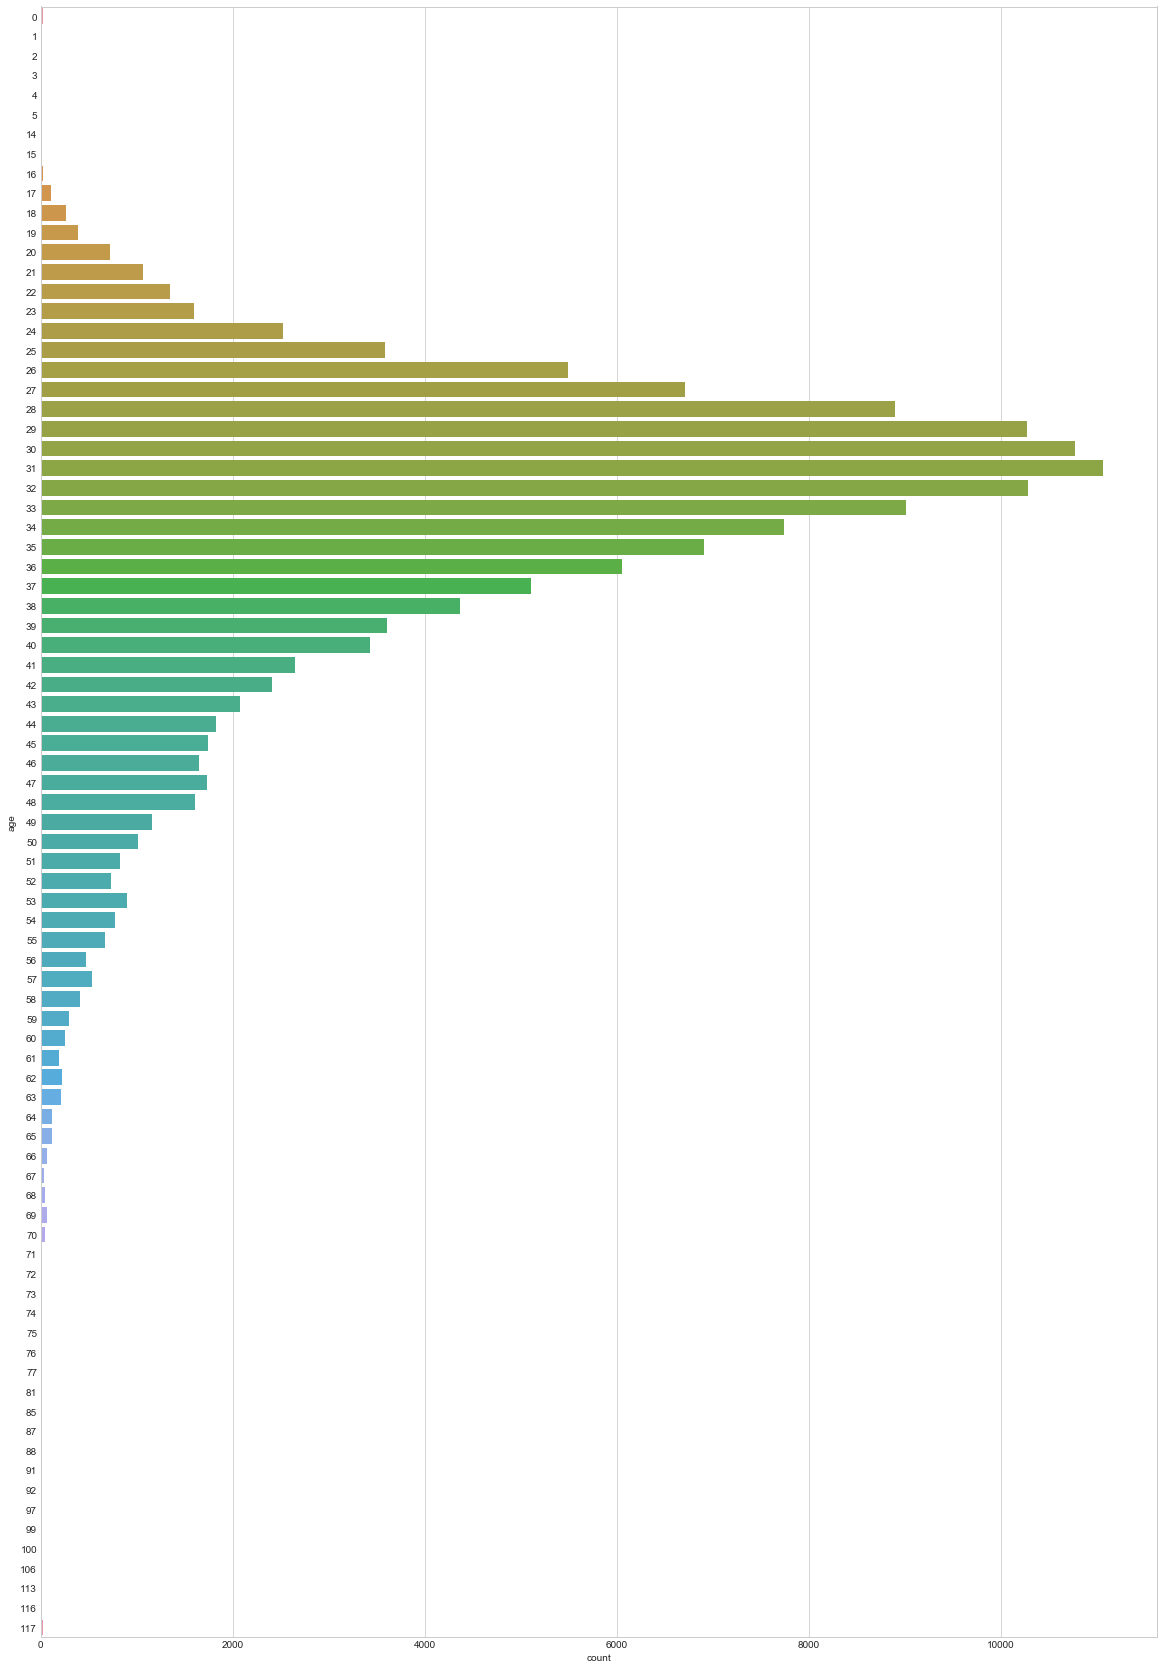

In [5]:
data_bin = pd.DataFrame()

data_bin['age'] = reviews['age']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 30)) 
sns.countplot(y = "age", data = data_bin);

In [6]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_age = three_sigma(reviews['age'])
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
print("Anomalies:")
data_anomaly_age

Count:  1840
Min:  0
Max:  117
Anomalies:


6         65
98        69
157       59
205       59
509       62
          ..
146109    69
146137    63
146189    61
146239    62
146270    59
Name: age, Length: 1840, dtype: int64

In [7]:
reviews_age60 = reviews.loc[reviews['age'] < 60]
data_anomaly_age = three_sigma(reviews_age60['age'])
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
print("Anomalies:")
data_anomaly_age

Count:  1290
Min:  0
Max:  59
Anomalies:


157       59
205       59
212       58
385       57
516       58
          ..
146033    58
146100    57
146192    57
146270    59
146284    57
Name: age, Length: 1290, dtype: int64

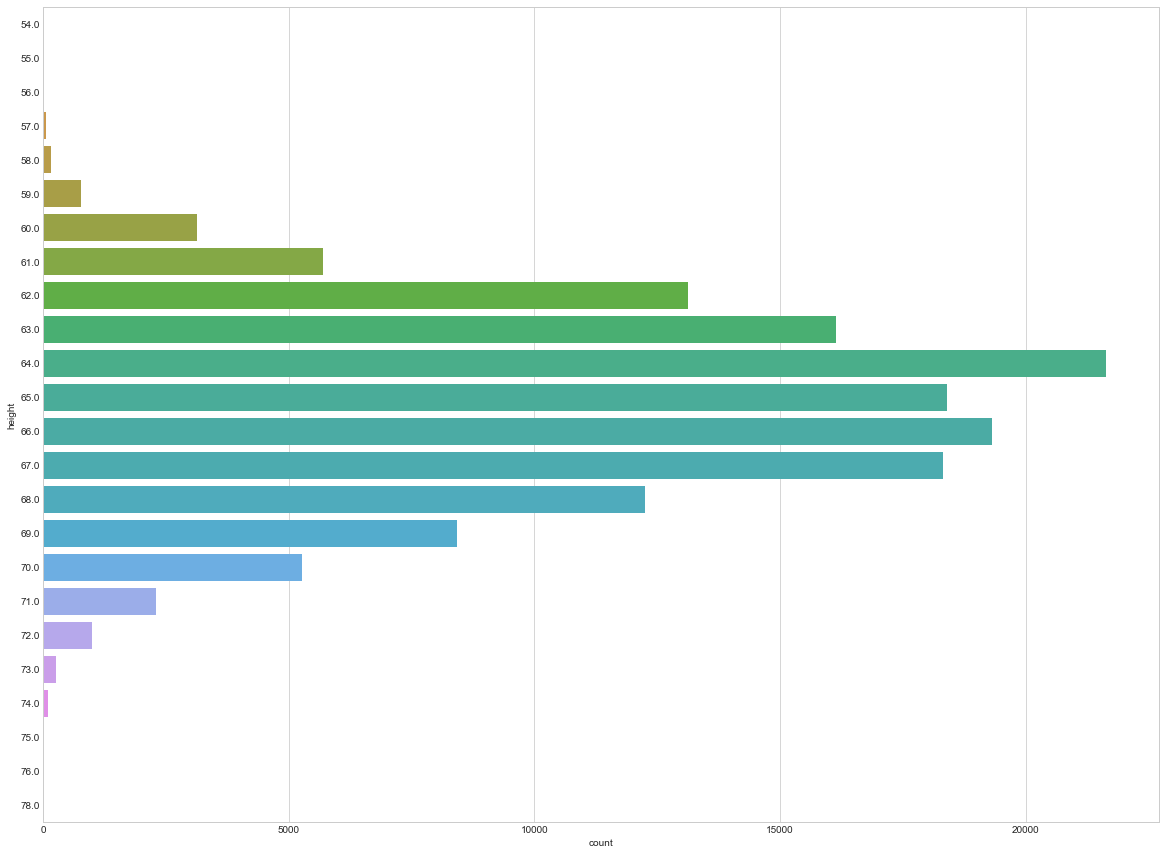

In [8]:
data_bin = pd.DataFrame()

data_bin['height'] = reviews['height']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 15)) 
sns.countplot(y = "height", data = data_bin);

In [9]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_height = three_sigma(reviews['height'])
print("Count:", data_anomaly_height.count())
print("Min: ", data_anomaly_height.min())
print("Max: ", data_anomaly_height.max())
print("Anomalies:")
data_anomaly_height

Count: 225
Min:  54.0
Max:  78.0
Anomalies:


465       56.0
581       74.0
2859      56.0
3162      75.0
4704      56.0
          ... 
143416    57.0
143591    76.0
145173    55.0
145779    75.0
146059    74.0
Name: height, Length: 225, dtype: float64

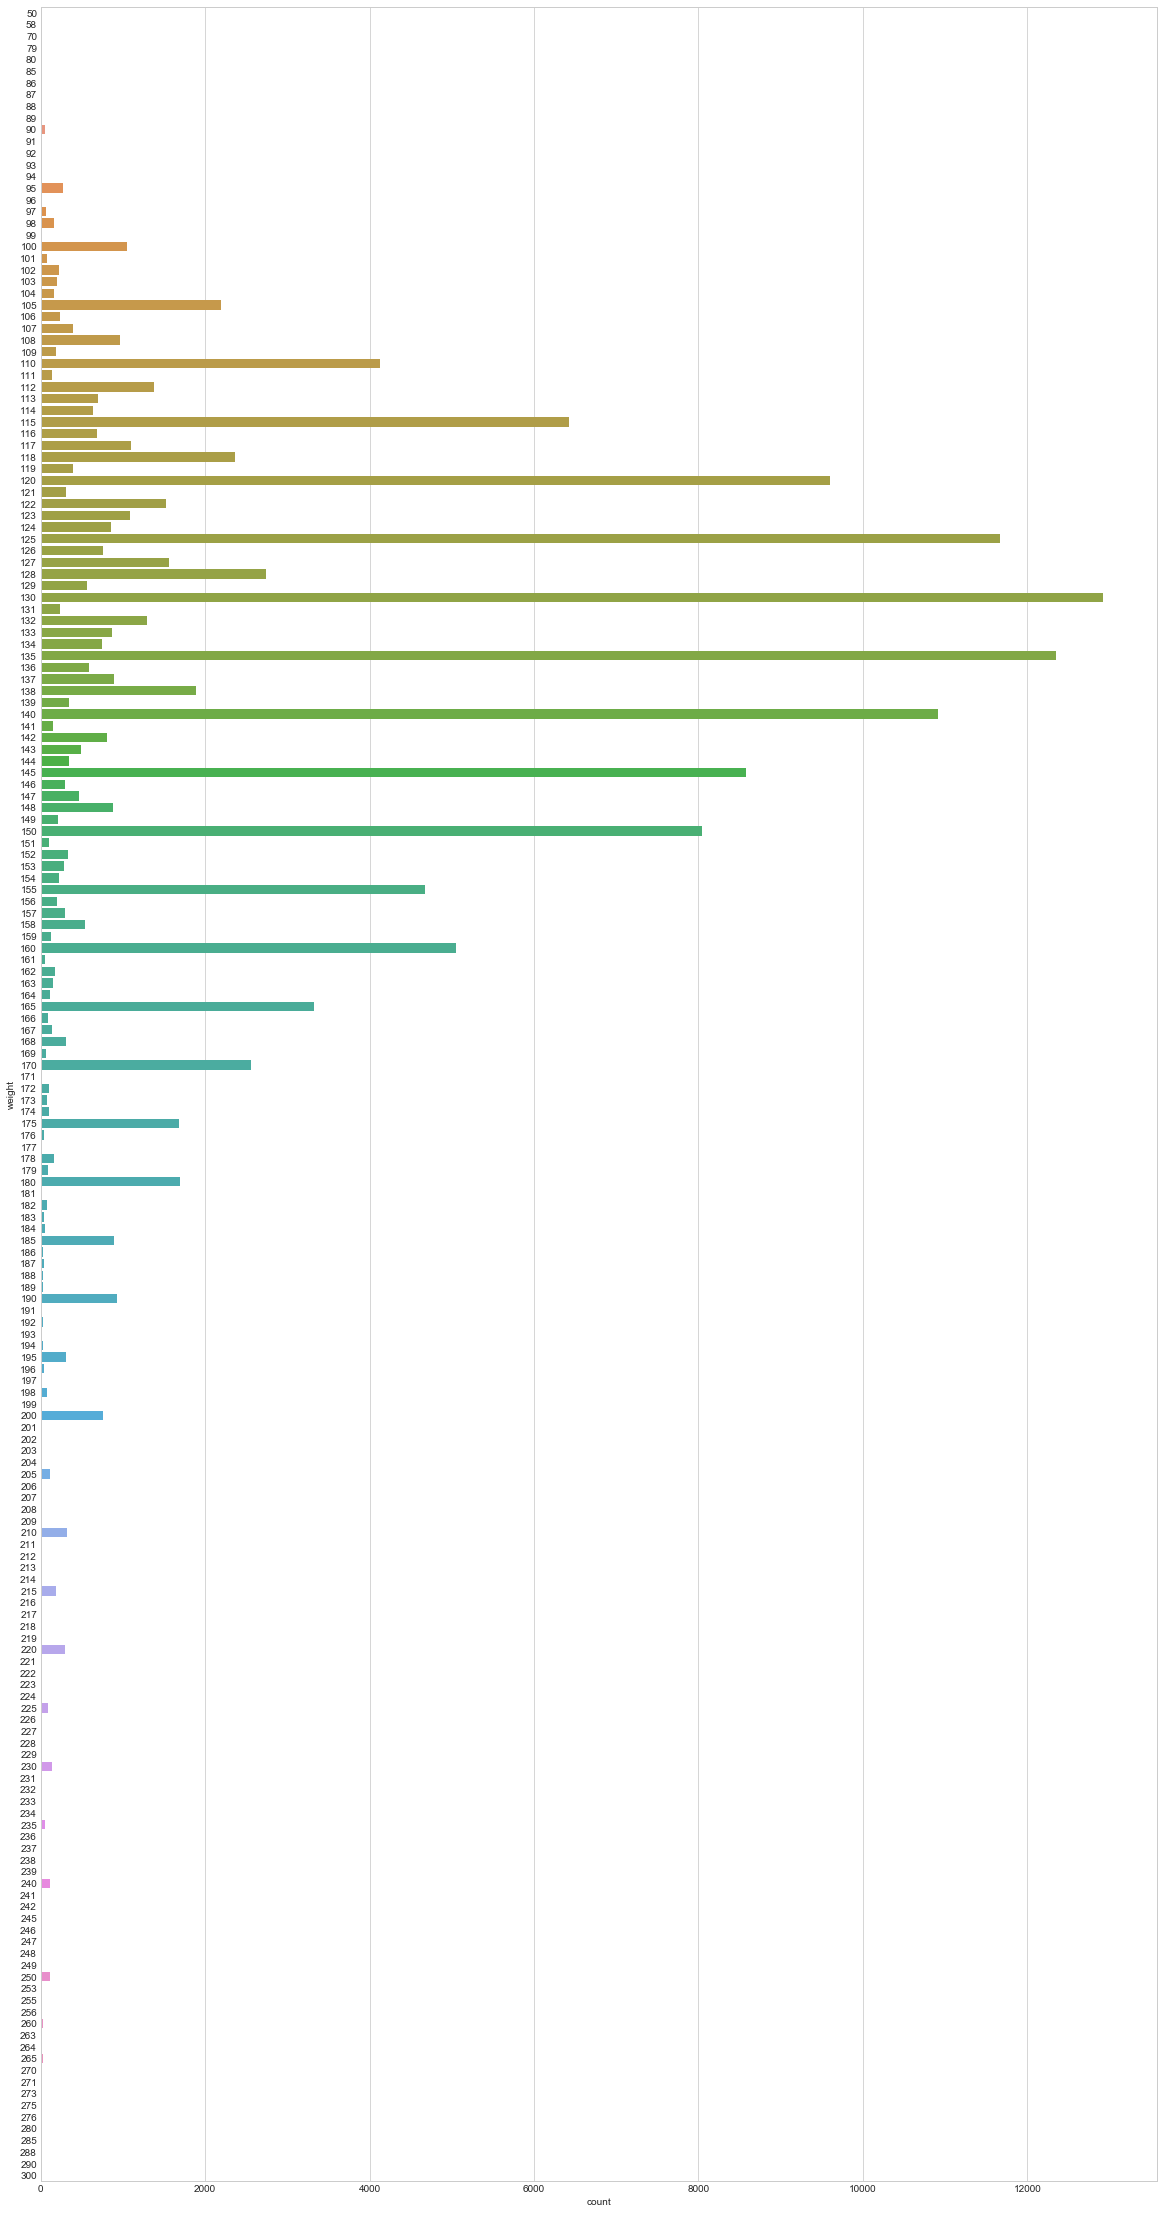

In [10]:
data_bin = pd.DataFrame()

data_bin['weight'] = reviews['weight']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 40)) 
sns.countplot(y = "weight", data = data_bin);

In [11]:
dfWeight = reviews.loc[reviews['weight'] % 5 == 0 ]

def three_sigmaWeight(Ser1):
    weight = reviews['weight']
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(weight.shape[0])[rule]
    outrange = weight.iloc[index]
    return outrange

data_anomaly_weight = three_sigma(dfWeight['weight'])
print("Count:", data_anomaly_weight.count())
print("Min: ", data_anomaly_weight.min())
print("Max: ", data_anomaly_weight.max())
print("Anomalies:")
data_anomaly_weight

Count: 1558
Min:  50
Max:  300
Anomalies:


87        250
109       210
116       220
148       210
188       220
         ... 
145703    210
145862    220
146022    215
146304    220
146366    220
Name: weight, Length: 1558, dtype: int64

#### Conclusion:
- Since a univariate outlier is defined by an observation with a variable that has an unusual value, the naive Bayes rules was applied to detect the outliers.
- The rules are applied to "age", "height", and "weight", since the rest fo the feartures such as "fit", "size" are better to be interpreted with other other features together 
- 3σ Rules was applied first, which theoretically should rejects 0.3% of the data. However, the function is returning more data than it should for "age" and "weight", which could be a result of data set not normally distributed.
- Boxplot was also applied to find the anomalies, which can be cross referenced with the results from 3σ rule.

Original Dataset Description: 
                 age
count  146381.000000
mean       34.089800
std         8.113217
min         0.000000
25%        29.000000
50%        32.000000
75%        37.000000
max       117.000000
Data set from observation Description: 
                 age
count  146165.000000
mean       34.043519
std         7.881440
min        16.000000
25%        29.000000
50%        32.000000
75%        37.000000
max        69.000000
Data set from boxplot Description: 
                 age
count  130159.000000
mean       31.989567
std         5.153699
min        18.000000
25%        28.000000
50%        32.000000
75%        35.000000
max        44.000000


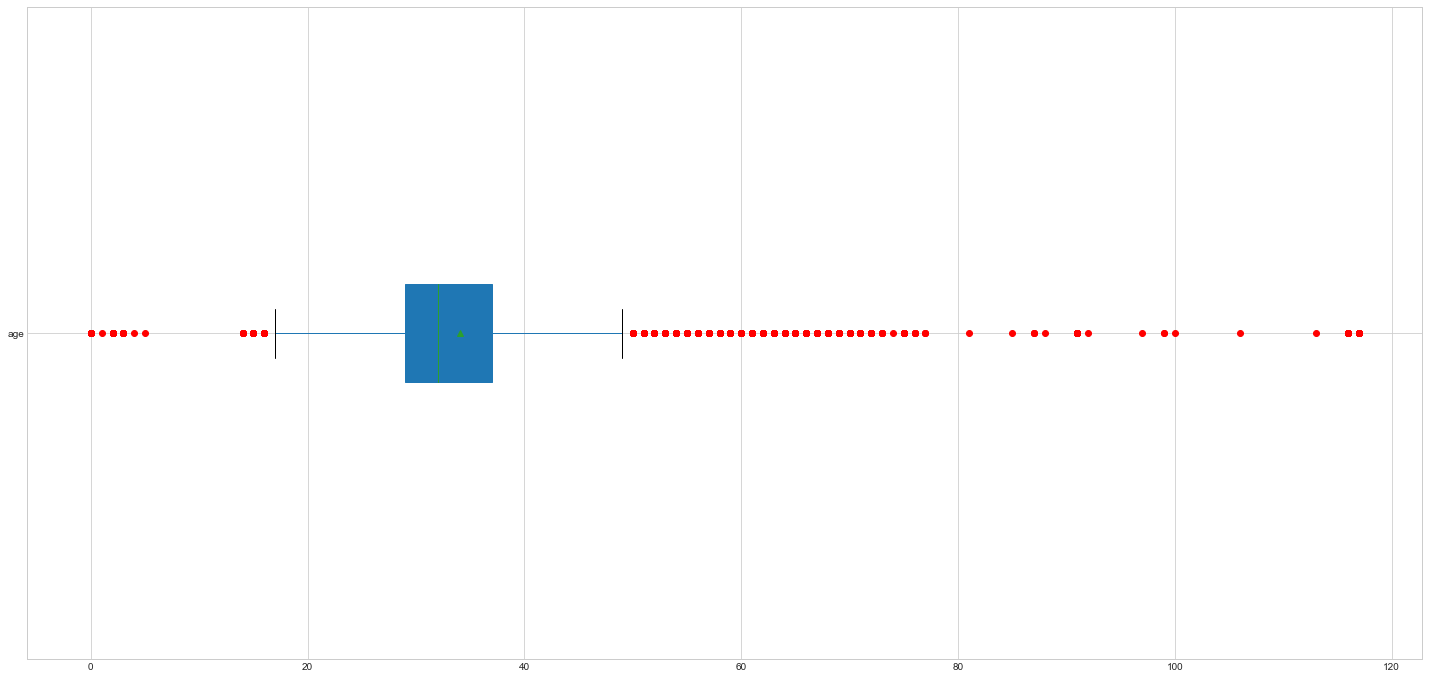

In [12]:
reviews_age = reviews[['age']]

statistics_origin = reviews_age.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_age.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_age[(reviews['age'] > 15)&(reviews['age'] < 70)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_age[(reviews['age'] > 17)&(reviews['age'] < 45)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
              height
count  146381.000000
mean       65.263053
std         2.659230
min        54.000000
25%        63.000000
50%        65.000000
75%        67.000000
max        78.000000
Data set from observation Description: 
              height
count  146307.000000
mean       65.262913
std         2.649975
min        57.000000
25%        63.000000
50%        65.000000
75%        67.000000
max        74.000000
Data set from boxplot Description: 
              height
count  146210.000000
mean       65.257116
std         2.641278
min        57.000000
25%        63.000000
50%        65.000000
75%        67.000000
max        73.000000


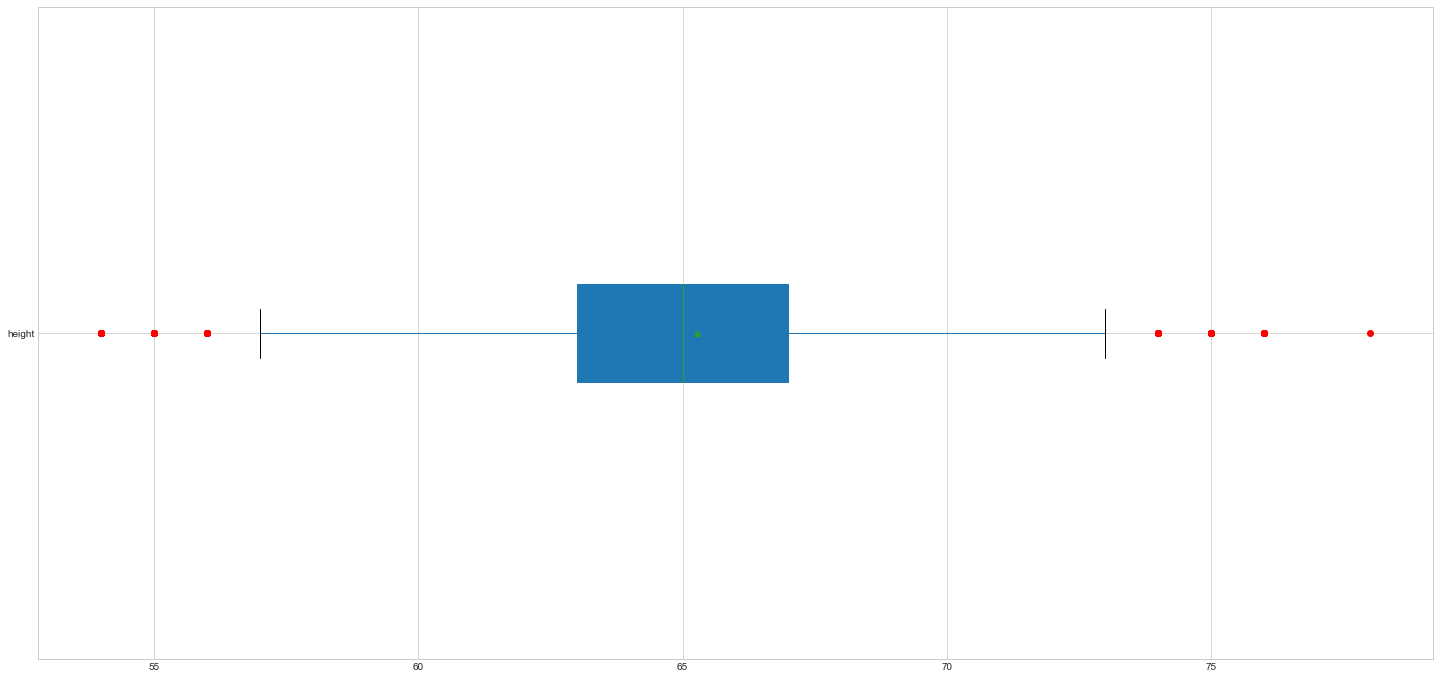

In [13]:
reviews_height = reviews[['height']]

statistics_origin = reviews_height.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_height.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 75)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 74)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
              weight
count  146381.000000
mean      137.209870
std        21.540182
min        50.000000
25%       123.000000
50%       135.000000
75%       148.000000
max       300.000000
Data set from observation Description: 
              weight
count  146021.000000
mean      137.057485
std        20.956128
min        95.000000
25%       123.000000
50%       135.000000
75%       148.000000
max       249.000000
Data set from boxplot Description: 
              weight
count  141261.000000
mean      134.824637
std        17.404032
min        86.000000
25%       122.000000
50%       134.000000
75%       145.000000
max       184.000000


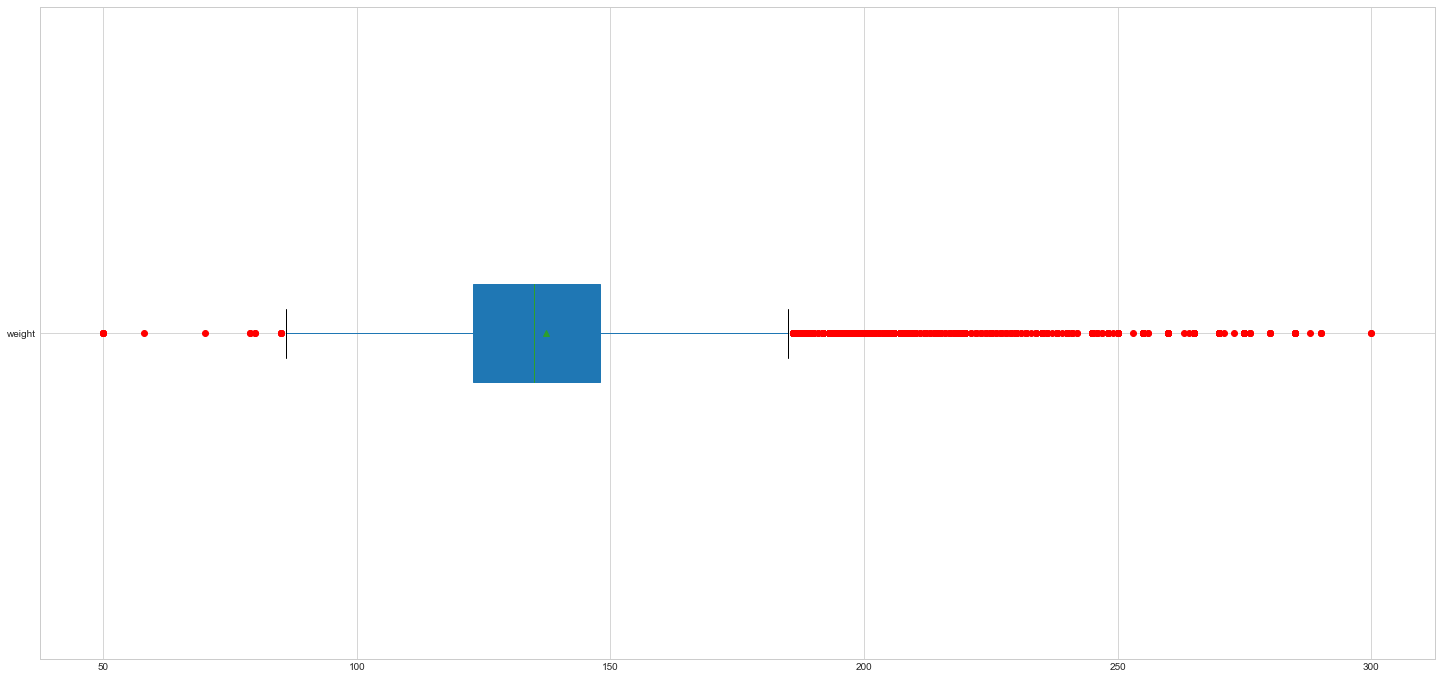

In [14]:
reviews_weight = reviews[['weight']]

statistics_origin = reviews_weight.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_weight.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_weight[(reviews['weight'] > 94)&(reviews['weight'] < 250)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_weight[(reviews['weight'] > 85)&(reviews['weight'] < 185)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

#### Conclusion
- Applying boxplot would reject more data points than the 3σ rule would do. 
- Boxplot is highly symmetric for the graph of "height", which once again could be the result of "height" being normally distributed.
- There are two ways to interpret the data: 
    - The first one could be catagorized as "fake data", which could tell by obsserving the dataset.This type of data is semantically meaningless. Data points such as age of 0 and age of 117 falls into this catagory.
    - The second one could be catagorized as "scarce data". They happen at a less frequency when compared to other data and is thus rejected by the algorithms. This type of data is less helpful when applying machine learning. Data points such as height of 78 inch and 54 inch would fall into this category.
- It leaves up to the data interpreter to decide how they want to look at the data
    

### Ⅱ. Multivariate
- Algorithm applied: Isolation forest

In [15]:
from sklearn.ensemble import IsolationForest

In [16]:
rng = np.random.RandomState(42)
ilf = IsolationForest(n_estimators = 100,
                      max_samples = 256,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.003
                      
    )
X_cols = ["category","rented_for"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
715,43,1,1,fit,67.0,2641483,10,8,2017-01-12,20,278259,160,590,4,-1
2222,38,3,1,fit,61.0,2121378,10,8,2016-04-14,1,625839,115,480,4,-1
2306,37,4,1,fit,68.0,2215751,10,8,2016-09-23,8,678149,127,480,3,-1
2317,48,6,1,fit,64.0,2342226,10,8,2017-03-08,4,766954,118,310,1,-1
2592,38,1,1,large,61.0,2195049,10,8,2015-09-29,1,773847,105,310,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145249,27,1,67,fit,68.0,2909134,10,8,2015-09-29,4,214197,125,710,4,-1
145280,29,2,1,fit,63.0,2184409,10,8,2017-09-09,16,115811,150,710,5,-1
145594,45,2,1,fit,65.0,1996278,4,8,2015-06-24,20,717788,155,710,4,-1
146039,28,3,1,fit,71.0,2696735,8,8,2016-02-25,16,249397,150,590,4,-1


In [17]:
X_cols = ["height","weight","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
87,27,2,16,fit,66.0,191514,10,3,2014-11-10,51,603920,250,1000,5,-1
93,34,0,16,fit,61.0,1072520,10,7,2015-05-20,48,963584,231,1000,5,-1
1202,30,2,45,small,61.0,828847,10,7,2017-04-18,45,194918,225,1370,5,-1
1256,29,2,45,fit,63.0,883916,10,4,2016-08-28,48,806378,240,1580,6,-1
2250,32,2,45,small,67.0,430096,8,4,2017-10-13,51,85726,230,1810,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144393,41,0,20,small,62.0,201534,10,2,2017-11-06,52,14500,228,2340,8,-1
144447,35,4,45,fit,65.0,157448,10,4,2014-02-12,45,944343,260,710,2,-1
145098,34,6,20,fit,73.0,1547971,8,2,2017-04-23,46,287349,270,1000,3,-1
145532,25,4,20,large,64.0,1446293,10,2,2017-01-02,45,694693,245,850,4,-1


In [18]:
X_cols = ["bust_volume","bust_height","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
148,30,2,16,fit,63.0,391525,10,7,2017-09-27,45,739261,210,1370,5,-1
188,32,0,45,small,66.0,1889597,8,7,2016-04-10,51,893699,220,1180,5,-1
1062,27,2,16,fit,67.0,1174307,8,7,2017-05-26,45,358750,225,1000,6,-1
1202,30,2,45,small,61.0,828847,10,7,2017-04-18,45,194918,225,1370,5,-1
1256,29,2,45,fit,63.0,883916,10,4,2016-08-28,48,806378,240,1580,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144568,34,3,16,fit,64.0,237589,4,7,2017-09-07,39,708165,180,1180,7,-1
145134,30,3,15,large,68.0,2493982,10,1,2017-10-26,20,348121,190,1180,7,-1
145547,39,3,20,fit,68.0,903647,10,2,2017-04-18,29,313383,165,1370,9,-1
145862,58,2,45,fit,64.0,1303995,10,7,2017-10-12,45,780783,220,1580,5,-1


In [19]:
X_cols = ["body_type", "weight", "size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
87,27,2,16,fit,66.0,191514,10,3,2014-11-10,51,603920,250,1000,5,-1
93,34,0,16,fit,61.0,1072520,10,7,2015-05-20,48,963584,231,1000,5,-1
188,32,0,45,small,66.0,1889597,8,7,2016-04-10,51,893699,220,1180,5,-1
1062,27,2,16,fit,67.0,1174307,8,7,2017-05-26,45,358750,225,1000,6,-1
1202,30,2,45,small,61.0,828847,10,7,2017-04-18,45,194918,225,1370,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144447,35,4,45,fit,65.0,157448,10,4,2014-02-12,45,944343,260,710,2,-1
144519,34,0,45,small,65.0,802815,8,2,2016-02-24,45,831635,220,850,4,-1
145098,34,6,20,fit,73.0,1547971,8,2,2017-04-23,46,287349,270,1000,3,-1
145532,25,4,20,large,64.0,1446293,10,2,2017-01-02,45,694693,245,850,4,-1


In [20]:
from sklearn import preprocessing
le_category = preprocessing.LabelEncoder()
reviews['fit']  = le_category.fit_transform(reviews['fit'])
le_category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
category_encoding = pd.DataFrame.from_dict(le_category_mapping, orient='index').rename(columns={0: 'encoding'})
category_encoding.index.name = 'labels'
category_encoding.head()

,encoding
labels,
fit,0
large,1
small,2


In [21]:
X_cols = ["fit", "weight", "size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
87,27,2,16,0,66.0,191514,10,3,2014-11-10,51,603920,250,1000,5,-1
93,34,0,16,0,61.0,1072520,10,7,2015-05-20,48,963584,231,1000,5,-1
188,32,0,45,2,66.0,1889597,8,7,2016-04-10,51,893699,220,1180,5,-1
1202,30,2,45,2,61.0,828847,10,7,2017-04-18,45,194918,225,1370,5,-1
1256,29,2,45,0,63.0,883916,10,4,2016-08-28,48,806378,240,1580,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144519,34,0,45,2,65.0,802815,8,2,2016-02-24,45,831635,220,850,4,-1
145098,34,6,20,0,73.0,1547971,8,2,2017-04-23,46,287349,270,1000,3,-1
145532,25,4,20,1,64.0,1446293,10,2,2017-01-02,45,694693,245,850,4,-1
145566,32,2,45,2,67.0,1695279,8,3,2014-10-09,45,781881,215,1000,5,-1


#### Conclusion
- The contamination I picked is 0.003, which rejects about 0.3% of the data.
- Considering the rationale behind the Isolation Forest, the data it produced would fall into "scarce data". In this case, since the rejection rate is low, only the data that happen at very loe frequency would be rejected. 
- For example, the conbination of a person that weighs 250 lbs and ordered a size 51 dress would be rejected. 
- It is hard to tell that the data is rejected because the low frequency of a person weighing 250 lbs or the person weighing 250 lbs should have ordered a different size, considering the isolation forest will reject anything that happens less frequently.